In [47]:
import os
import pandas as pd 

In [48]:
path = '../../Data/UK_Wide_Data'    

# find all csv file paths
csv_names = []

# loop all csv folders
for folder in os.listdir(path):
        
            # extract the CSVs in each folder
            folder_contents = os.listdir(f'{path}/{folder}')
            
            # loop through each file
            for file in folder_contents:
                
                    if "stop-and-search.csv" in file:

                        # add each csv file name    
                        csv_names.append(f'{path}/{folder}/{file}')

# print the number of CSVs -- 108
print(f'There are {len(csv_names)} different CSVs')

There are 1495 different CSVs


In [49]:
stops = []

# loop through the csvs
for csv in csv_names:
    
    # collect the stop and search data
    if "stop-and-search.csv" in csv:
        df = pd.read_csv(csv)
        df["source_file"] = csv  # Add column with the CSV filename
        stops.append(df)
    else:
        print(f'Error with CSV: {csv}')

# concat each df
stops_df = pd.concat(stops, ignore_index=True)

display(stops_df)


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file
0,Person search,2020-01-01T00:55:00+00:00,NaN,NaN,51.451062,-2.596436,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
1,Person search,2020-01-01T01:22:00+00:00,NaN,NaN,51.349567,-2.946702,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
2,Person search,2020-01-01T02:15:00+00:00,NaN,NaN,51.457808,-2.590766,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,True,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
3,Person and Vehicle search,2020-01-01T07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Male,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
4,Person and Vehicle search,2020-01-01T07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Female,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...


In [50]:
stops_df['Year'] = stops_df['Date'].str.split('-').str[0]
# stops_df['Year'] = pd.to_datetime(stops_df['Year'])

stops_df = stops_df[stops_df['Year'] == '2022']








def smart_title(text):
    skip_words = {'and', 'or', 'the', 'of', 'in', 'on', 'at', 'for', 'by'}
    parts = text.split('-')
    new_parts = []
    for p in parts:
        if p.lower() in skip_words:
            new_parts.append(p.lower())
        else:
            new_parts.append(p.capitalize())
    return '-'.join(new_parts)

stops_df['source_file'] = stops_df['source_file'].str.split('/').str[5].str[8:-20].apply(smart_title)




stops_df

C:\Users\15kof\AppData\Local\Temp\ipykernel_6344\3745402711.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_df['source_file'] = stops_df['source_file'].str.split('/').str[5].str[8:-20].apply(smart_title)


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file,Year
1231174,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231175,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Pakistani,Asian,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231176,Person search,2022-01-01T00:08:00+00:00,NaN,NaN,51.491781,-2.519850,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,Avon-and-Somerset,2022
1231177,Person search,2022-01-01T00:30:00+00:00,NaN,NaN,51.453357,-2.597833,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Penalty Notice for Disorder,False,False,Avon-and-Somerset,2022
1231178,Person search,2022-01-01T00:58:00+00:00,NaN,NaN,51.454134,-2.595396,Male,18-24,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Avon-and-Somerset,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,West-Yorkshire,2022


In [51]:


# stops_df = stops_df.dropna(subset=['Longitude'])






# stops_df['source_file'].str.split('.csv')



stops_df['source_file'].value_counts()

# stops_df

source_file
Metropolitan          145097
Merseyside             53347
West-Midlands          29680
Essex                  17738
West-Yorkshire         17572
Thames-Valley          14127
South-Yorkshire        12549
Kent                   12478
Lancashire             11461
Btp                    10960
Surrey                 10190
Hampshire               9392
Dyfed-Powys             7322
Hertfordshire           6979
Cleveland               6558
Devon-and-Cornwall      5581
Sussex                  5409
Leicestershire          5190
Northumbria             4819
South-Wales             4663
Staffordshire           4322
Norfolk                 4134
Bedfordshire            4131
Suffolk                 4000
West-Mercia             3822
Northamptonshire        3491
Nottinghamshire         3430
Durham                  3377
Cumbria                 3365
Avon-and-Somerset       3286
North-Wales             3277
Lincolnshire            3152
Cambridgeshire          2884
Gwent                   2824
De

In [52]:
stops_df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file,Year
1231174,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231175,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Pakistani,Asian,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231176,Person search,2022-01-01T00:08:00+00:00,NaN,NaN,51.491781,-2.519850,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,Avon-and-Somerset,2022
1231177,Person search,2022-01-01T00:30:00+00:00,NaN,NaN,51.453357,-2.597833,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Penalty Notice for Disorder,False,False,Avon-and-Somerset,2022
1231178,Person search,2022-01-01T00:58:00+00:00,NaN,NaN,51.454134,-2.595396,Male,18-24,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Avon-and-Somerset,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,West-Yorkshire,2022


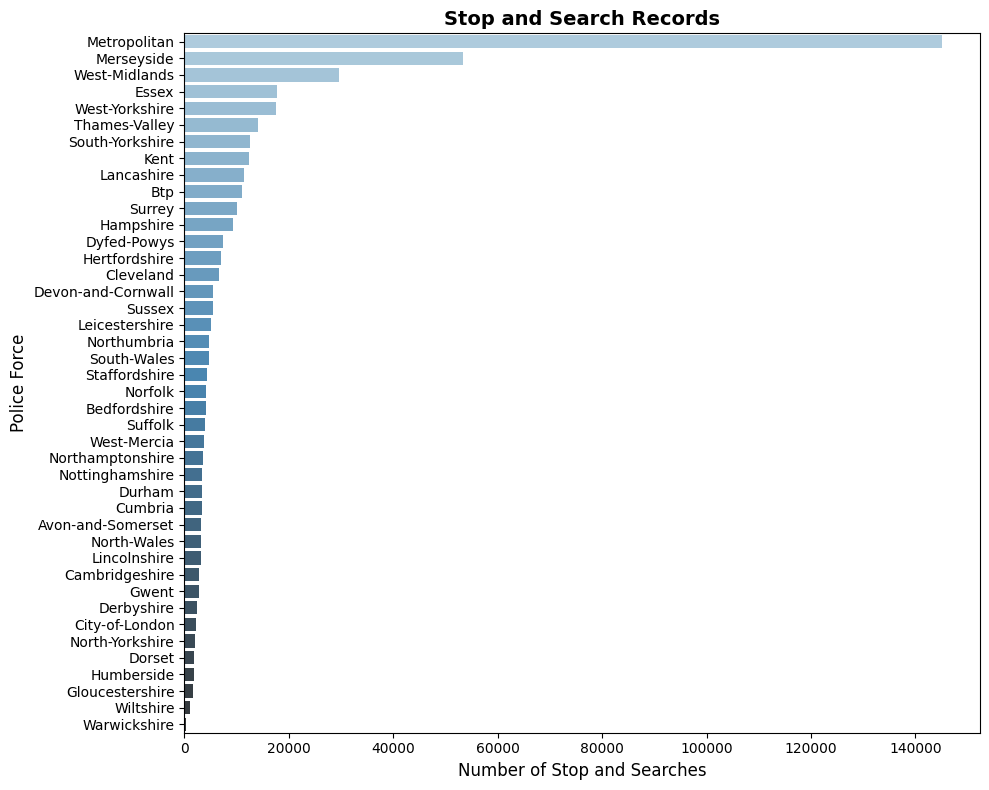

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
# sns.set(style="whitegrid")

# Get the counts and convert to DataFrame for hue compatibility
source_counts = stops_df['source_file'].value_counts().reset_index()
source_counts.columns = ['source_file', 'count']

# Plot using source_file as hue (even though it's just for colour)
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=source_counts,
    x='count',
    y='source_file',
    hue='source_file',
    dodge=False,
    palette='Blues_d',
    legend=False
)

# Add labels and title
plt.xlabel("Number of Stop and Searches", fontsize=12)
plt.ylabel("Police Force", fontsize=12)
plt.title("Stop and Search Records", fontsize=14, weight='bold')

# Add data labels
# for i, v in enumerate(source_counts['count']):
#     ax.text(v + max(source_counts['count']) * 0.01, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()


# Missing Data

In [54]:
import os
import pandas as pd 

In [ ]:
stops_df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file,Year
1231174,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231175,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Pakistani,Asian,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231176,Person search,2022-01-01T00:08:00+00:00,NaN,NaN,51.491781,-2.519850,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,Avon-and-Somerset,2022
1231177,Person search,2022-01-01T00:30:00+00:00,NaN,NaN,51.453357,-2.597833,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Penalty Notice for Disorder,False,False,Avon-and-Somerset,2022
1231178,Person search,2022-01-01T00:58:00+00:00,NaN,NaN,51.454134,-2.595396,Male,18-24,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Avon-and-Somerset,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,West-Yorkshire,2022


In [58]:
stops_df = stops_df[['Longitude', 'Latitude', 'source_file']]

stops_df

,Longitude,Latitude,source_file
1231174,NaN,NaN,Avon-and-Somerset
1231175,NaN,NaN,Avon-and-Somerset
1231176,-2.519850,51.491781,Avon-and-Somerset
1231177,-2.597833,51.453357,Avon-and-Somerset
1231178,-2.595396,51.454134,Avon-and-Somerset
...,...,...,...
1685498,-1.848456,53.791698,West-Yorkshire
1685499,-1.531368,53.748284,West-Yorkshire
1685500,-1.531368,53.748284,West-Yorkshire
1685501,-1.531368,53.748284,West-Yorkshire


In [59]:
# Count of rows with missing Longitude by region
missing_lng_counts = stops_df[stops_df['Longitude'].isna()]['source_file'].value_counts()
print(missing_lng_counts)


source_file
Metropolitan          15041
South-Yorkshire       12549
Thames-Valley          6227
Lancashire             5501
Nottinghamshire        3430
Cleveland              2170
Merseyside             2079
Hertfordshire          1509
Dyfed-Powys            1423
Humberside             1177
South-Wales            1173
Hampshire              1046
Gwent                   980
West-Yorkshire          914
Devon-and-Cornwall      902
Btp                     901
West-Mercia             797
Bedfordshire            790
City-of-London          596
Avon-and-Somerset       506
Staffordshire           489
Northamptonshire        339
Warwickshire            318
Essex                   282
Suffolk                 260
Norfolk                 203
Cumbria                 196
Dorset                  111
North-Wales             102
North-Yorkshire          76
Derbyshire               60
Lincolnshire             39
Sussex                   25
Kent                     25
Gloucestershire          15
Durham  

In [60]:
# London missing Longitude count
london_missing = stops_df[(stops_df['source_file'] == 'Metropolitan') & (stops_df['Longitude'].isna())].shape[0]

# Merseyside missing Longitude count
merseyside_missing = stops_df[(stops_df['source_file'] == 'Merseyside') & (stops_df['Longitude'].isna())].shape[0]

print(f"London missing Longitude: {london_missing}")
print(f"Merseyside missing Longitude: {merseyside_missing}")


London missing Longitude: 15041
Merseyside missing Longitude: 2079


In [62]:
# Total counts per region
london_total = stops_df[stops_df['source_file'] == 'Metropolitan'].shape[0]
merseyside_total = stops_df[stops_df['source_file'] == 'Merseyside'].shape[0]
west_midlands_total = stops_df[stops_df['source_file'] == 'West-Midlands'].shape[0]

# Missing Longitude counts per region
london_missing = stops_df[(stops_df['source_file'] == 'Metropolitan') & (stops_df['Longitude'].isna())].shape[0]
merseyside_missing = stops_df[(stops_df['source_file'] == 'Merseyside') & (stops_df['Longitude'].isna())].shape[0]
west_midlands_missing = stops_df[(stops_df['source_file'] == 'West-Midlands') & (stops_df['Longitude'].isna())].shape[0]

# Percentage missing
london_pct_missing = (london_missing / london_total) * 100
merseyside_pct_missing = (merseyside_missing / merseyside_total) * 100
west_midlands_pct_missing = (west_midlands_missing / west_midlands_total) * 100

# Print results
print(f"London missing Longitude: {london_missing} of {london_total} ({london_pct_missing:.2f}%)")
print(f"Merseyside missing Longitude: {merseyside_missing} of {merseyside_total} ({merseyside_pct_missing:.2f}%)")
print(f"West Midlands missing Longitude: {west_midlands_missing} of {west_midlands_total} ({west_midlands_pct_missing:.2f}%)")


London missing Longitude: 15041 of 145097 (10.37%)
Merseyside missing Longitude: 2079 of 53347 (3.90%)
West Midlands missing Longitude: 0 of 29680 (0.00%)


# London & Merseyside Ethnicity Breakdown